In [20]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score

In [ ]:
pwd

In [ ]:
cd ..

In [23]:
from src.utils.helpers import set_seed

In [24]:
# set random seeds
seed = 1
set_seed(seed)

In [ ]:
os.chdir("/path/to...")

In [26]:
data = pd.read_csv("signatures_only.tsv", sep='\t')

In [27]:
data

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P,Donor_ID,Tumor_Type
0,0.006640,0.000000,0.024105,0.0,0.059251,0.0,0.0,0.0,0.0,0.087421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,DO46416,Ovary-AdenoCA
1,0.015065,0.000000,0.013724,0.0,0.024993,0.0,0.0,0.0,0.0,0.470598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,DO46416,Ovary-AdenoCA
2,0.002369,0.000000,0.001961,0.0,0.036958,0.0,0.0,0.0,0.0,0.146005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,DO46416,Ovary-AdenoCA
3,0.013464,0.000000,0.003783,0.0,0.052696,0.0,0.0,0.0,0.0,0.212169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,DO46416,Ovary-AdenoCA
4,0.000482,0.000000,0.001808,0.0,0.021504,0.0,0.0,0.0,0.0,0.003869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,DO46416,Ovary-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41318711,0.075958,0.124540,0.003822,0.0,0.000000,0.0,0.0,0.0,0.0,0.039914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000095,0,DO51503,Panc-AdenoCA
41318712,0.859196,0.008950,0.000259,0.0,0.000000,0.0,0.0,0.0,0.0,0.002744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0,DO51503,Panc-AdenoCA
41318713,0.075958,0.124540,0.003822,0.0,0.000000,0.0,0.0,0.0,0.0,0.039914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000095,0,DO51503,Panc-AdenoCA
41318714,0.243249,0.046960,0.004287,0.0,0.000000,0.0,0.0,0.0,0.0,0.145679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,DO51503,Panc-AdenoCA


In [28]:
# Automatically select signature columns
signature_cols = [col for col in data.columns if col.startswith('BI')]

# Group and sum
signature_matrix = data.groupby('Donor_ID')[signature_cols].sum()

In [29]:
signature_matrix 

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS74_S,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1000,301.417835,1.044750e+02,10.268279,0.0,0.0,0.0,0.0,0.0,0.0,268.367008,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.618526e+00,0.0,0
DO1001,231.856075,2.506608e-289,238.064360,0.0,0.0,0.0,0.0,0.0,0.0,344.954992,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,8.934184e-01,0.0,0
DO1002,156.518133,2.219938e+02,497.906054,0.0,0.0,0.0,0.0,0.0,0.0,535.137203,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.978042e+00,0.0,0
DO1003,237.174226,8.528349e+01,189.420516,0.0,0.0,0.0,0.0,0.0,0.0,515.755982,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0
DO1004,338.226016,2.370719e+02,687.355262,0.0,0.0,0.0,0.0,0.0,0.0,1485.664606,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,9.039484e-105,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,3640.118634,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,555.723425,...,0.0,0.0,0.0,1822.105836,0.000000,0.0,0.0,0.000000e+00,0.0,0
DO9732,2816.172352,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1111.022578,...,0.0,0.0,0.0,925.293140,0.000000,0.0,0.0,0.000000e+00,0.0,0
DO9788,3415.432334,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1409.214948,...,0.0,0.0,0.0,250.913181,0.000000,0.0,0.0,0.000000e+00,0.0,0


In [30]:
# unique Donor_ID tissue df
tumor_type_map = data.drop_duplicates("Donor_ID").set_index("Donor_ID")["Tumor_Type"]
tumor_type_map

Donor_ID
DO46416     Ovary-AdenoCA
DO36062     CNS-PiloAstro
DO45049         Liver-HCC
DO22145         CNS-Oligo
DO48578    Panc-Endocrine
                ...      
DO51079     Prost-AdenoCA
DO52704         Lymph-CLL
DO23552         Liver-HCC
DO720         Bladder-TCC
DO51503      Panc-AdenoCA
Name: Tumor_Type, Length: 2583, dtype: object

In [31]:
# add tissue to df
signature_matrix = signature_matrix.join(tumor_type_map)
signature_matrix

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1000,301.417835,1.044750e+02,10.268279,0.0,0.0,0.0,0.0,0.0,0.0,268.367008,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.618526e+00,0.0,0,Breast-DCIS
DO1001,231.856075,2.506608e-289,238.064360,0.0,0.0,0.0,0.0,0.0,0.0,344.954992,...,0.0,0.0,0.000000,0.000000,0.0,0.0,8.934184e-01,0.0,0,Breast-AdenoCa
DO1002,156.518133,2.219938e+02,497.906054,0.0,0.0,0.0,0.0,0.0,0.0,535.137203,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.978042e+00,0.0,0,Breast-AdenoCa
DO1003,237.174226,8.528349e+01,189.420516,0.0,0.0,0.0,0.0,0.0,0.0,515.755982,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0,Breast-AdenoCa
DO1004,338.226016,2.370719e+02,687.355262,0.0,0.0,0.0,0.0,0.0,0.0,1485.664606,...,0.0,0.0,0.000000,0.000000,0.0,0.0,9.039484e-105,0.0,0,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,3640.118634,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,555.723425,...,0.0,0.0,1822.105836,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA
DO9732,2816.172352,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1111.022578,...,0.0,0.0,925.293140,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA
DO9788,3415.432334,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1409.214948,...,0.0,0.0,250.913181,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA


In [32]:
counts = signature_matrix['Tumor_Type'].value_counts()
df_filtered = signature_matrix[signature_matrix['Tumor_Type'].map(counts) >= 20]
df_filtered # 91 samples of 10 tumor types excluded

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,231.856075,2.506608e-289,238.064360,0.0,0.0,0.0,0.0,0.0,0.0,344.954992,...,0.0,0.0,0.000000,0.000000,0.0,0.0,8.934184e-01,0.0,0,Breast-AdenoCa
DO1002,156.518133,2.219938e+02,497.906054,0.0,0.0,0.0,0.0,0.0,0.0,535.137203,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.978042e+00,0.0,0,Breast-AdenoCa
DO1003,237.174226,8.528349e+01,189.420516,0.0,0.0,0.0,0.0,0.0,0.0,515.755982,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0,Breast-AdenoCa
DO1004,338.226016,2.370719e+02,687.355262,0.0,0.0,0.0,0.0,0.0,0.0,1485.664606,...,0.0,0.0,0.000000,0.000000,0.0,0.0,9.039484e-105,0.0,0,Breast-AdenoCa
DO1005,227.598808,3.794859e+02,218.567810,0.0,0.0,0.0,0.0,0.0,0.0,306.762186,...,0.0,0.0,0.000000,0.000000,0.0,0.0,9.565852e-01,0.0,0,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,3640.118634,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,555.723425,...,0.0,0.0,1822.105836,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA
DO9732,2816.172352,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1111.022578,...,0.0,0.0,925.293140,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA
DO9788,3415.432334,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1409.214948,...,0.0,0.0,250.913181,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA


In [33]:
df_filtered.to_parquet("signature_matrix.parquet")

In [34]:
data = pd.read_parquet('signature_matrix.parquet')
data

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,231.856075,2.506608e-289,238.064360,0.0,0.0,0.0,0.0,0.0,0.0,344.954992,...,0.0,0.0,0.000000,0.000000,0.0,0.0,8.934184e-01,0.0,0,Breast-AdenoCa
DO1002,156.518133,2.219938e+02,497.906054,0.0,0.0,0.0,0.0,0.0,0.0,535.137203,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.978042e+00,0.0,0,Breast-AdenoCa
DO1003,237.174226,8.528349e+01,189.420516,0.0,0.0,0.0,0.0,0.0,0.0,515.755982,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0,Breast-AdenoCa
DO1004,338.226016,2.370719e+02,687.355262,0.0,0.0,0.0,0.0,0.0,0.0,1485.664606,...,0.0,0.0,0.000000,0.000000,0.0,0.0,9.039484e-105,0.0,0,Breast-AdenoCa
DO1005,227.598808,3.794859e+02,218.567810,0.0,0.0,0.0,0.0,0.0,0.0,306.762186,...,0.0,0.0,0.000000,0.000000,0.0,0.0,9.565852e-01,0.0,0,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,3640.118634,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,555.723425,...,0.0,0.0,1822.105836,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA
DO9732,2816.172352,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1111.022578,...,0.0,0.0,925.293140,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA
DO9788,3415.432334,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1409.214948,...,0.0,0.0,250.913181,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA


## Performance measure, KNN

In [35]:
train_data, val_test_data = train_test_split(data, test_size=0.3, random_state=seed, stratify=data['Tumor_Type'])

In [61]:
validation_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=seed, stratify=val_test_data['Tumor_Type'])

In [37]:
# both train and val set make up the final train set, so as to match the DGD approach
concat = pd.concat([train_data, validation_data], axis=0)
concat

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO50420,1331.947157,80.539790,14.528955,0.0,1.942716e+02,0.0,0.0,0.0,0.0,553.334909,...,0.0,0.0,0.0,0.0,0.0,5.575940e-134,0.0,0.000000,0,Prost-AdenoCA
DO52701,113.224299,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,154.781189,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0,Lymph-CLL
DO51500,1198.178349,74.114526,33.296056,0.0,0.000000e+00,0.0,0.0,0.0,0.0,326.053988,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.563063,0,Panc-AdenoCA
DO10829,330.950172,18.752038,0.000000,0.0,1.333814e+02,0.0,0.0,0.0,0.0,49.764847,...,0.0,0.0,0.0,0.0,0.0,2.678667e+01,0.0,0.000000,0,Prost-AdenoCA
DO51069,571.613727,49.099483,11.731188,0.0,2.800000e-15,0.0,0.0,0.0,0.0,119.393060,...,0.0,0.0,0.0,0.0,0.0,3.702786e-217,0.0,0.000000,0,Prost-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46328,528.726061,0.000000,34.060785,0.0,2.958138e+02,0.0,0.0,0.0,0.0,397.422019,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0,Ovary-AdenoCA
DO23028,240.584693,194.250988,24.749747,0.0,3.679397e+03,0.0,0.0,0.0,0.0,542.576822,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0,Liver-HCC
DO48925,57.427897,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,131.517214,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0,CNS-Medullo


In [38]:
merged_df = concat.sort_index(axis=0)
merged_df

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,231.856075,2.506608e-289,238.064360,0.0,0.0,0.0,0.0,0.0,0.0,344.954992,...,0.0,0.0,0.000000,0.000000,0.0,0.0,8.934184e-01,0.0,0,Breast-AdenoCa
DO1002,156.518133,2.219938e+02,497.906054,0.0,0.0,0.0,0.0,0.0,0.0,535.137203,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.978042e+00,0.0,0,Breast-AdenoCa
DO1003,237.174226,8.528349e+01,189.420516,0.0,0.0,0.0,0.0,0.0,0.0,515.755982,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0,Breast-AdenoCa
DO1004,338.226016,2.370719e+02,687.355262,0.0,0.0,0.0,0.0,0.0,0.0,1485.664606,...,0.0,0.0,0.000000,0.000000,0.0,0.0,9.039484e-105,0.0,0,Breast-AdenoCa
DO1005,227.598808,3.794859e+02,218.567810,0.0,0.0,0.0,0.0,0.0,0.0,306.762186,...,0.0,0.0,0.000000,0.000000,0.0,0.0,9.565852e-01,0.0,0,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9106,1721.593050,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,264.324743,...,0.0,0.0,157.542270,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA
DO9700,3640.118634,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,555.723425,...,0.0,0.0,1822.105836,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA
DO9732,2816.172352,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1111.022578,...,0.0,0.0,925.293140,0.000000,0.0,0.0,0.000000e+00,0.0,0,ColoRect-AdenoCA


In [39]:
X_train = merged_df.iloc[:, :-1]
y_train = merged_df['Tumor_Type'] 

In [40]:
X_train

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS74_S,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,231.856075,2.506608e-289,238.064360,0.0,0.0,0.0,0.0,0.0,0.0,344.954992,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,8.934184e-01,0.0,0
DO1002,156.518133,2.219938e+02,497.906054,0.0,0.0,0.0,0.0,0.0,0.0,535.137203,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.978042e+00,0.0,0
DO1003,237.174226,8.528349e+01,189.420516,0.0,0.0,0.0,0.0,0.0,0.0,515.755982,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0
DO1004,338.226016,2.370719e+02,687.355262,0.0,0.0,0.0,0.0,0.0,0.0,1485.664606,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,9.039484e-105,0.0,0
DO1005,227.598808,3.794859e+02,218.567810,0.0,0.0,0.0,0.0,0.0,0.0,306.762186,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,9.565852e-01,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9106,1721.593050,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,264.324743,...,0.0,0.0,0.0,157.542270,0.000000,0.0,0.0,0.000000e+00,0.0,0
DO9700,3640.118634,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,555.723425,...,0.0,0.0,0.0,1822.105836,0.000000,0.0,0.0,0.000000e+00,0.0,0
DO9732,2816.172352,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1111.022578,...,0.0,0.0,0.0,925.293140,0.000000,0.0,0.0,0.000000e+00,0.0,0


In [41]:
test_data

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO51074,452.885931,82.470118,5.023349,0.000000,2.212224e+02,0.0,0.0,0.0,0.0,237.579539,...,0.0,0.0,0.000000,0.0,0.0,51.488404,0.0,0.000000,0,Prost-AdenoCA
DO51496,2300.846680,113.814526,31.558739,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,154.169820,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.208084,0,Panc-AdenoCA
DO15046,374.149839,3385.762983,0.000000,2620.870666,8.335615e+02,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,Head-SCC
DO6558,190.057375,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,319.122516,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,Lymph-CLL
DO50410,1942.362156,310.971134,35.173680,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,670.946983,...,0.0,0.0,650.462356,0.0,0.0,0.000000,0.0,0.000000,0,Eso-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46400,1073.860871,0.000000,156.654713,0.000000,6.136675e+02,0.0,0.0,0.0,0.0,2878.831029,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,Ovary-AdenoCA
DO51514,1819.233502,355.690296,37.886744,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,391.884411,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.397385,0,Panc-AdenoCA
DO51144,795.789835,75.296220,10.181021,0.000000,4.708631e-105,0.0,0.0,0.0,0.0,271.801191,...,0.0,0.0,0.000000,0.0,0.0,29.904530,0.0,0.000000,0,Prost-AdenoCA


In [42]:
X_test = test_data.iloc[:,:-1]
y_test = test_data['Tumor_Type'] 

In [43]:
X_test

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS74_S,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO51074,452.885931,82.470118,5.023349,0.000000,2.212224e+02,0.0,0.0,0.0,0.0,237.579539,...,0.0,0.0,0.0,0.000000,0.0,0.0,51.488404,0.0,0.000000,0
DO51496,2300.846680,113.814526,31.558739,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,154.169820,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.208084,0
DO15046,374.149839,3385.762983,0.000000,2620.870666,8.335615e+02,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
DO6558,190.057375,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,319.122516,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
DO50410,1942.362156,310.971134,35.173680,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,670.946983,...,0.0,0.0,0.0,650.462356,0.0,0.0,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46400,1073.860871,0.000000,156.654713,0.000000,6.136675e+02,0.0,0.0,0.0,0.0,2878.831029,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
DO51514,1819.233502,355.690296,37.886744,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,391.884411,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.397385,0
DO51144,795.789835,75.296220,10.181021,0.000000,4.708631e-105,0.0,0.0,0.0,0.0,271.801191,...,0.0,0.0,0.0,0.000000,0.0,0.0,29.904530,0.0,0.000000,0


In [44]:
y_test

Donor_ID
DO51074    Prost-AdenoCA
DO51496     Panc-AdenoCA
DO15046         Head-SCC
DO6558         Lymph-CLL
DO50410      Eso-AdenoCa
               ...      
DO46400    Ovary-AdenoCA
DO51514     Panc-AdenoCA
DO51144    Prost-AdenoCA
DO23551        Liver-HCC
DO31420    Ovary-AdenoCA
Name: Tumor_Type, Length: 374, dtype: object

In [45]:
# knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [46]:
# the prediction accuracy
sum(predictions == y_test)/len(y_test)

0.7941176470588235

In [47]:
sklearn_adjusted_rand_score = adjusted_rand_score(predictions, y_test) # Calculate Adjusted Rand Score
sklearn_adjusted_rand_score

0.6737910037547118

In [48]:
labels = np.unique(y_test)
labels

array(['Biliary-AdenoCA', 'Bladder-TCC', 'Bone-Leiomyo', 'Bone-Osteosarc',
       'Breast-AdenoCa', 'CNS-GBM', 'CNS-Medullo', 'CNS-PiloAstro',
       'ColoRect-AdenoCA', 'Eso-AdenoCa', 'Head-SCC', 'Kidney-ChRCC',
       'Kidney-RCC', 'Liver-HCC', 'Lung-AdenoCA', 'Lung-SCC',
       'Lymph-BNHL', 'Lymph-CLL', 'Myeloid-MPN', 'Ovary-AdenoCA',
       'Panc-AdenoCA', 'Panc-Endocrine', 'Prost-AdenoCA', 'Skin-Melanoma',
       'Stomach-AdenoCA', 'Thy-AdenoCA', 'Uterus-AdenoCA'], dtype=object)

In [49]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions, labels=labels)

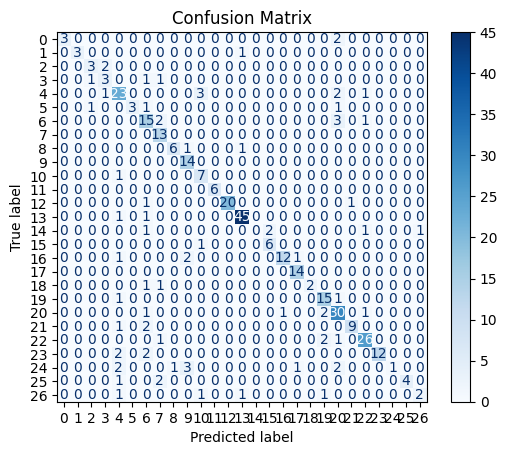

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

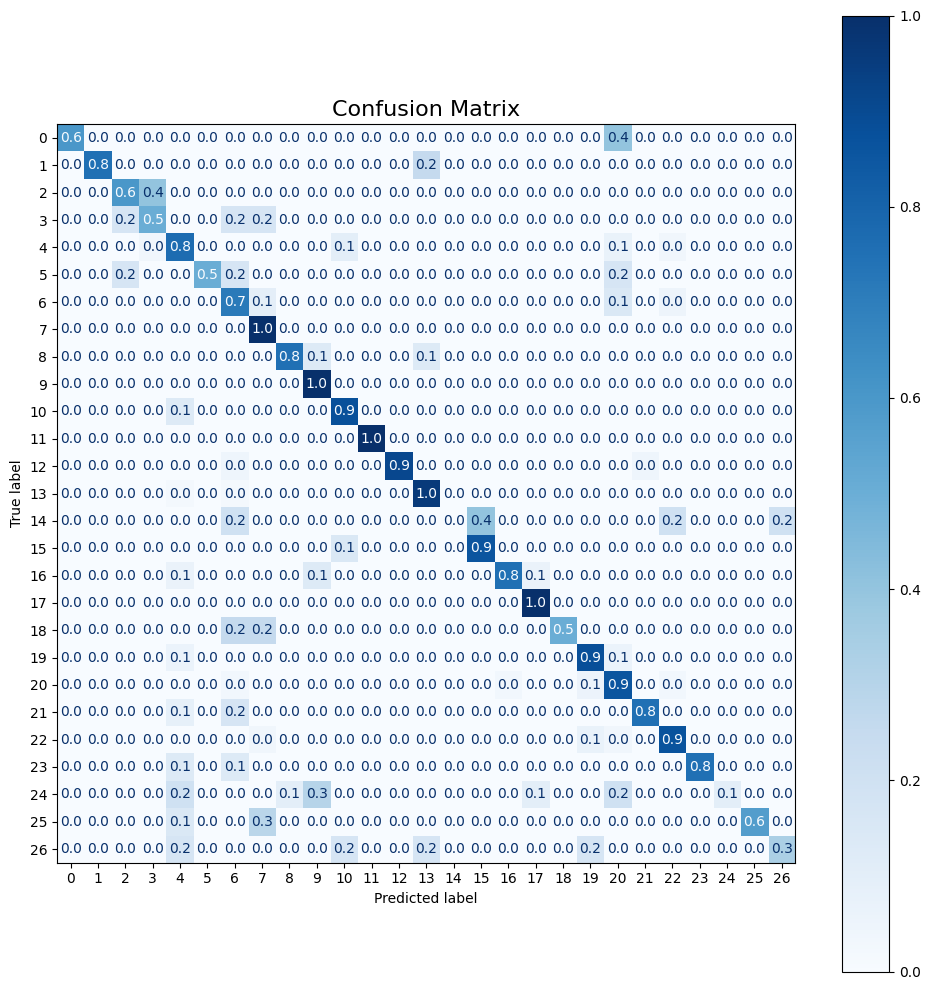

In [51]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10))  # Bigger figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized)
disp.plot(cmap='Blues', ax=ax, values_format=".1f")  

plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()

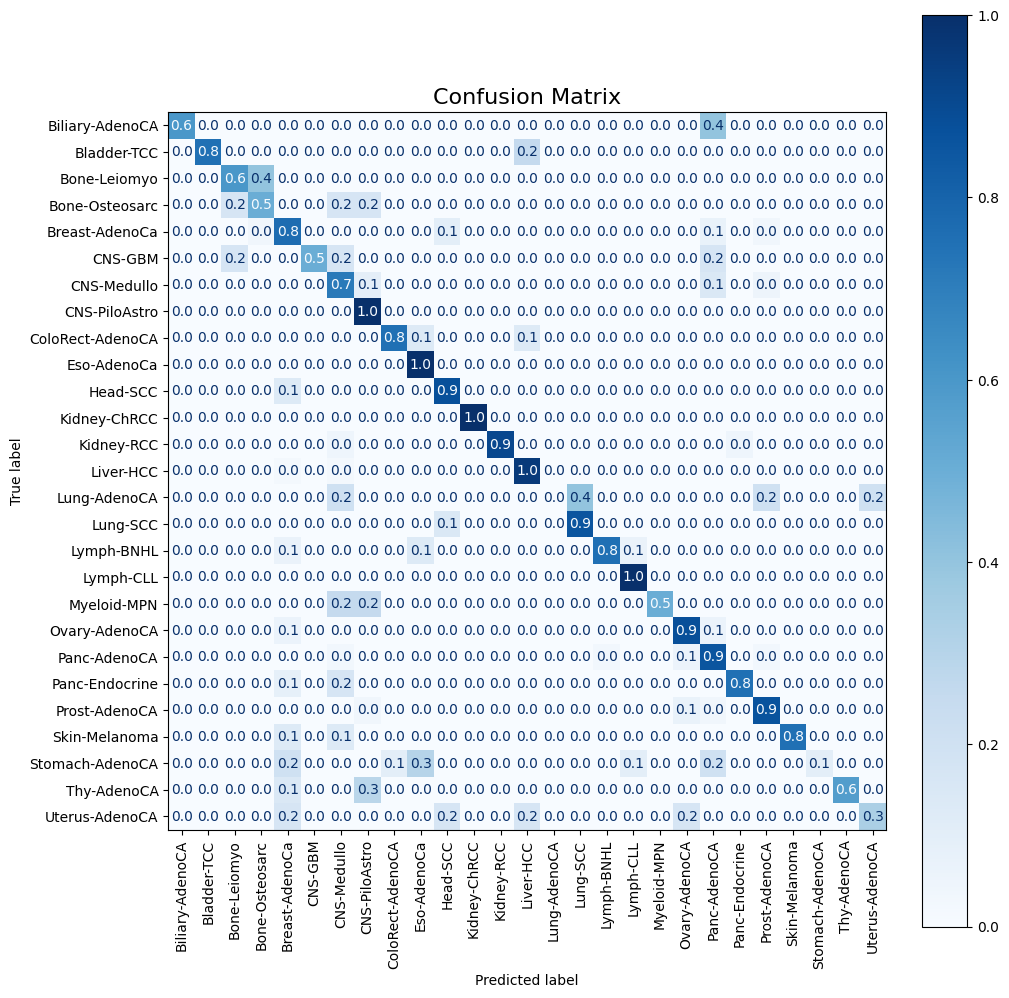

In [52]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, values_format=".1f", xticks_rotation=90)

plt.title('Confusion Matrix', fontsize=16)

plt.savefig(f"MutSig_CM.pdf", bbox_inches='tight')

plt.show()


## PCA of mutational signatures

In [53]:
# remove non-features or tissue
df_toPCA = concat.iloc[:,:-1]
df_toPCA

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS74_S,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO50420,1331.947157,80.539790,14.528955,0.0,1.942716e+02,0.0,0.0,0.0,0.0,553.334909,...,0.0,0.0,0.0,0.0,0.0,0.0,5.575940e-134,0.0,0.000000,0
DO52701,113.224299,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,154.781189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0
DO51500,1198.178349,74.114526,33.296056,0.0,0.000000e+00,0.0,0.0,0.0,0.0,326.053988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.563063,0
DO10829,330.950172,18.752038,0.000000,0.0,1.333814e+02,0.0,0.0,0.0,0.0,49.764847,...,0.0,0.0,0.0,0.0,0.0,0.0,2.678667e+01,0.0,0.000000,0
DO51069,571.613727,49.099483,11.731188,0.0,2.800000e-15,0.0,0.0,0.0,0.0,119.393060,...,0.0,0.0,0.0,0.0,0.0,0.0,3.702786e-217,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46328,528.726061,0.000000,34.060785,0.0,2.958138e+02,0.0,0.0,0.0,0.0,397.422019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0
DO23028,240.584693,194.250988,24.749747,0.0,3.679397e+03,0.0,0.0,0.0,0.0,542.576822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0
DO48925,57.427897,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,131.517214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_toPCA)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
pca_result_scaled = pca.fit_transform(df_scaled)

In [56]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.11724789 0.08207678 0.0786168  0.07495007 0.05050165]


In [57]:
# make df and combine by index
pca_result_df = pd.DataFrame(pca_result_scaled, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [58]:
concat['Tumor_Type']

Donor_ID
DO50420     Prost-AdenoCA
DO52701         Lymph-CLL
DO51500      Panc-AdenoCA
DO10829     Prost-AdenoCA
DO51069     Prost-AdenoCA
                ...      
DO46328     Ovary-AdenoCA
DO23028         Liver-HCC
DO48925       CNS-Medullo
DO52667        Lymph-BNHL
DO220363     Kidney-ChRCC
Name: Tumor_Type, Length: 2118, dtype: object

In [59]:
pca_result_df['Tumor_Type'] = concat['Tumor_Type'].values

In [62]:
pca_result_df

,PC1,PC2,PC3,PC4,PC5,Tumor_Type
0,-0.601288,0.202529,0.014300,-0.356686,-0.633669,Prost-AdenoCA
1,-0.613868,0.553685,-0.551417,-0.180512,-0.799222,Lymph-CLL
2,-0.116561,-0.274147,0.425493,-0.258237,-0.876983,Panc-AdenoCA
3,-0.969948,0.956712,-0.840767,-0.481542,-0.634542,Prost-AdenoCA
4,-0.764799,0.660553,-0.553705,-0.408249,-0.573724,Prost-AdenoCA
...,...,...,...,...,...,...
2113,-0.518607,0.236654,0.010797,-0.275614,-0.142885,Ovary-AdenoCA
2114,-0.221645,-0.110190,0.068282,-0.575356,1.563315,Liver-HCC
2115,-0.981639,1.031328,-0.939287,-0.464025,-0.644641,CNS-Medullo
2116,1.253719,-1.388070,1.819542,2.223500,-1.072214,Lymph-BNHL


In [71]:
test_to_PCA = test_data.iloc[:,:-1]
test_to_PCA

,BI_COMPOSITE_SNV_SBS1_P,BI_COMPOSITE_SNV_SBS2_P,BI_COMPOSITE_SNV_SBS3_P,BI_COMPOSITE_SNV_SBS4_P,BI_COMPOSITE_SNV_SBS5_P,BI_COMPOSITE_SNV_SBS6_S,BI_COMPOSITE_SNV_SBS7a_S,BI_COMPOSITE_SNV_SBS7b_S,BI_COMPOSITE_SNV_SBS7c_S,BI_COMPOSITE_SNV_SBS8_P,...,BI_COMPOSITE_SNV_SBS74_S,BI_COMPOSITE_SNV_SBS75_S,BI_COMPOSITE_SNV_SBS76_S,BI_COMPOSITE_SNV_SBS77_P,BI_COMPOSITE_SNV_SBS78_S,BI_COMPOSITE_SNV_SBS79_S,BI_COMPOSITE_SNV_SBS80_P,BI_COMPOSITE_SNV_SBS81_P,BI_COMPOSITE_SNV_SBS82_P,BI_COMPOSITE_SNV_SBS83_P
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO51074,452.885931,82.470118,5.023349,0.000000,2.212224e+02,0.0,0.0,0.0,0.0,237.579539,...,0.0,0.0,0.0,0.000000,0.0,0.0,51.488404,0.0,0.000000,0
DO51496,2300.846680,113.814526,31.558739,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,154.169820,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.208084,0
DO15046,374.149839,3385.762983,0.000000,2620.870666,8.335615e+02,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
DO6558,190.057375,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,319.122516,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
DO50410,1942.362156,310.971134,35.173680,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,670.946983,...,0.0,0.0,0.0,650.462356,0.0,0.0,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46400,1073.860871,0.000000,156.654713,0.000000,6.136675e+02,0.0,0.0,0.0,0.0,2878.831029,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
DO51514,1819.233502,355.690296,37.886744,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,391.884411,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.397385,0
DO51144,795.789835,75.296220,10.181021,0.000000,4.708631e-105,0.0,0.0,0.0,0.0,271.801191,...,0.0,0.0,0.0,0.000000,0.0,0.0,29.904530,0.0,0.000000,0


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test_to_PCA)

In [73]:
test_scaled

array([[-0.28813594, -0.24847216, -0.32818737, ..., -0.15104385,
        -0.28626545,  0.        ],
       [ 2.33868602, -0.21522507, -0.14858873, ..., -0.15104385,
         3.88462682,  0.        ],
       [-0.40005698,  3.25533924, -0.36218674, ..., -0.15104385,
        -0.28626545,  0.        ],
       ...,
       [ 0.1992919 , -0.25608154, -0.29327886, ..., -0.15104385,
        -0.28626545,  0.        ],
       [-0.28509153, -0.01204738, -0.1696957 , ..., -0.15104385,
        -0.28626545,  0.        ],
       [-0.31488566, -0.33594843, -0.22492301, ..., -0.15104385,
        -0.28626545,  0.        ]])

In [74]:
test_pca_transformed = pca.transform(test_scaled)
test_pca_transformed

array([[-1.00233922,  0.83053871, -0.77309005, -0.55253473, -0.43578955],
       [-0.52623628, -0.18634482,  0.51136823, -0.36023177, -1.36493556],
       [ 3.57064636, -2.93326855,  1.33002552,  0.01868587,  3.26893965],
       ...,
       [-0.8827763 ,  0.5667232 , -0.42862932, -0.52006517, -0.59554545],
       [ 1.20223343, -1.61824728,  1.08165927, -0.28688687,  2.12926882],
       [-0.67326316,  0.07672383,  0.13723722, -0.44077504, -0.04117467]])

In [75]:
test_pca_transformed = pd.DataFrame(test_pca_transformed, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])

In [76]:
test_pca_transformed

,PC1,PC2,PC3,PC4,PC5
0,-1.002339,0.830539,-0.773090,-0.552535,-0.435790
1,-0.526236,-0.186345,0.511368,-0.360232,-1.364936
2,3.570646,-2.933269,1.330026,0.018686,3.268940
3,-1.009826,0.975542,-0.891046,-0.528878,-0.744423
4,1.316090,-2.316321,2.835274,0.134594,-1.794541
...,...,...,...,...,...
369,-0.012113,-1.169197,1.339157,-0.273691,1.144925
370,-0.053183,-0.889340,1.244342,-0.063618,-1.243835
371,-0.882776,0.566723,-0.428629,-0.520065,-0.595545
372,1.202233,-1.618247,1.081659,-0.286887,2.129269


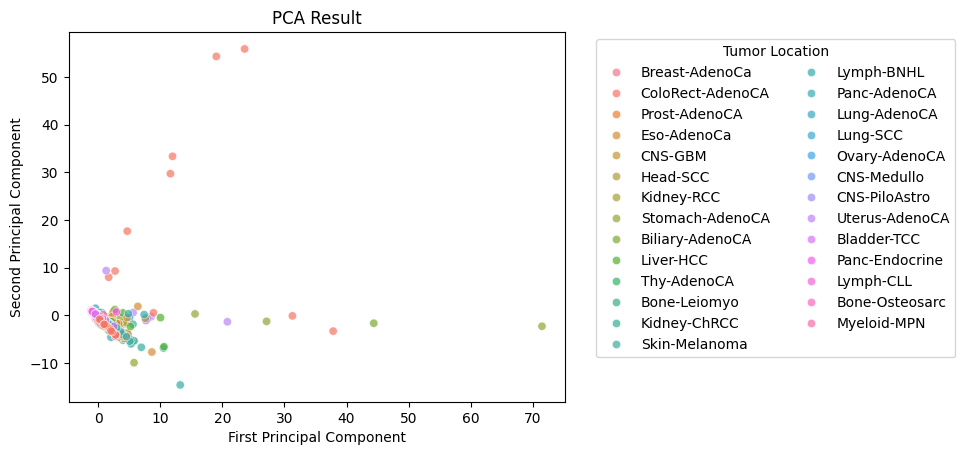

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC1', y='PC2', hue='Tumor_Type', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

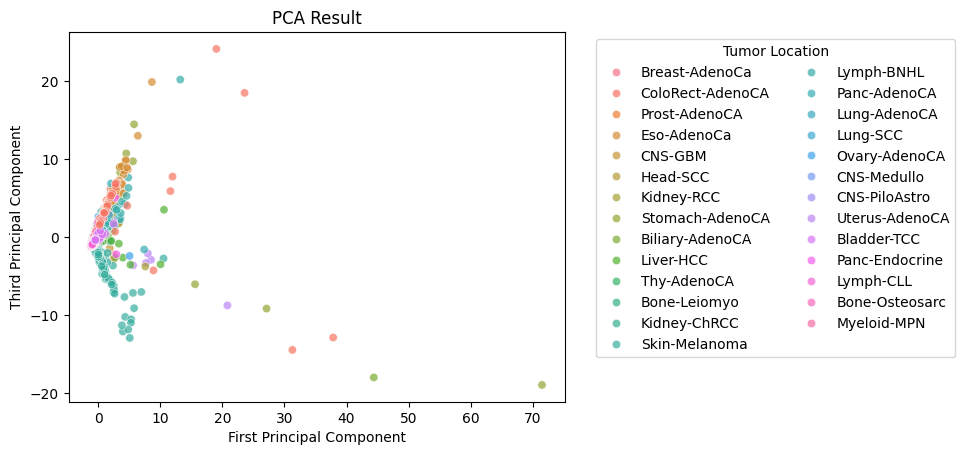

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC1', y='PC3', hue='Tumor_Type', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

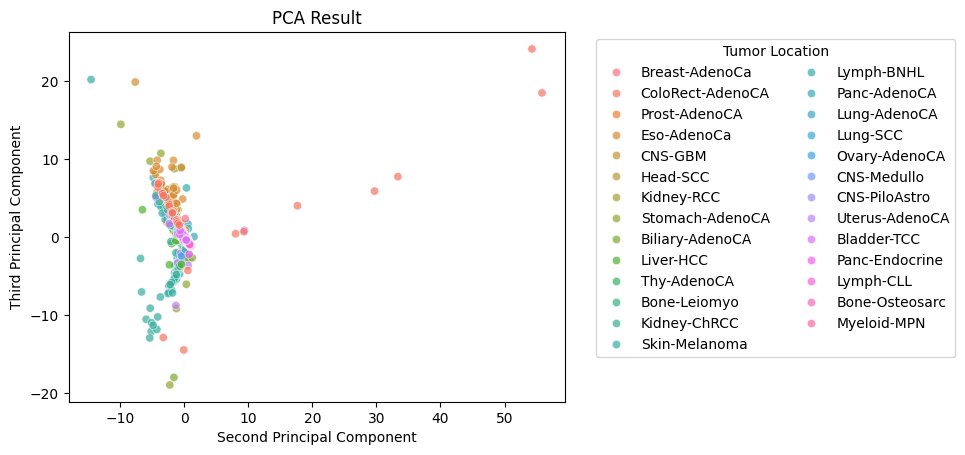

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC2', y='PC3', hue='Tumor_Type', alpha=0.7)
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

## Performance measure on the PCs of mut sigs

In [77]:
X_train = pca_result_df.iloc[:, :-1]
y_train = pca_result_df['Tumor_Type'] 

In [78]:
X_train

,PC1,PC2,PC3,PC4,PC5
0,-0.601288,0.202529,0.014300,-0.356686,-0.633669
1,-0.613868,0.553685,-0.551417,-0.180512,-0.799222
2,-0.116561,-0.274147,0.425493,-0.258237,-0.876983
3,-0.969948,0.956712,-0.840767,-0.481542,-0.634542
4,-0.764799,0.660553,-0.553705,-0.408249,-0.573724
...,...,...,...,...,...
2113,-0.518607,0.236654,0.010797,-0.275614,-0.142885
2114,-0.221645,-0.110190,0.068282,-0.575356,1.563315
2115,-0.981639,1.031328,-0.939287,-0.464025,-0.644641
2116,1.253719,-1.388070,1.819542,2.223500,-1.072214


In [85]:
X_test = test_pca_transformed
y_test = test_data['Tumor_Type'] 

In [86]:
X_test

,PC1,PC2,PC3,PC4,PC5
0,-1.002339,0.830539,-0.773090,-0.552535,-0.435790
1,-0.526236,-0.186345,0.511368,-0.360232,-1.364936
2,3.570646,-2.933269,1.330026,0.018686,3.268940
3,-1.009826,0.975542,-0.891046,-0.528878,-0.744423
4,1.316090,-2.316321,2.835274,0.134594,-1.794541
...,...,...,...,...,...
369,-0.012113,-1.169197,1.339157,-0.273691,1.144925
370,-0.053183,-0.889340,1.244342,-0.063618,-1.243835
371,-0.882776,0.566723,-0.428629,-0.520065,-0.595545
372,1.202233,-1.618247,1.081659,-0.286887,2.129269


In [87]:
y_test

Donor_ID
DO51074    Prost-AdenoCA
DO51496     Panc-AdenoCA
DO15046         Head-SCC
DO6558         Lymph-CLL
DO50410      Eso-AdenoCa
               ...      
DO46400    Ovary-AdenoCA
DO51514     Panc-AdenoCA
DO51144    Prost-AdenoCA
DO23551        Liver-HCC
DO31420    Ovary-AdenoCA
Name: Tumor_Type, Length: 374, dtype: object

In [88]:
# knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [89]:
# the prediction accuracy
sum(predictions == y_test)/len(y_test)

0.5294117647058824

In [90]:
sklearn_adjusted_rand_score = adjusted_rand_score(predictions, y_test) # Calculate Adjusted Rand Score
sklearn_adjusted_rand_score

0.3992683726401155

In [91]:
labels = np.unique(y_test)
labels

array(['Biliary-AdenoCA', 'Bladder-TCC', 'Bone-Leiomyo', 'Bone-Osteosarc',
       'Breast-AdenoCa', 'CNS-GBM', 'CNS-Medullo', 'CNS-PiloAstro',
       'ColoRect-AdenoCA', 'Eso-AdenoCa', 'Head-SCC', 'Kidney-ChRCC',
       'Kidney-RCC', 'Liver-HCC', 'Lung-AdenoCA', 'Lung-SCC',
       'Lymph-BNHL', 'Lymph-CLL', 'Myeloid-MPN', 'Ovary-AdenoCA',
       'Panc-AdenoCA', 'Panc-Endocrine', 'Prost-AdenoCA', 'Skin-Melanoma',
       'Stomach-AdenoCA', 'Thy-AdenoCA', 'Uterus-AdenoCA'], dtype=object)

In [92]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions, labels=labels)

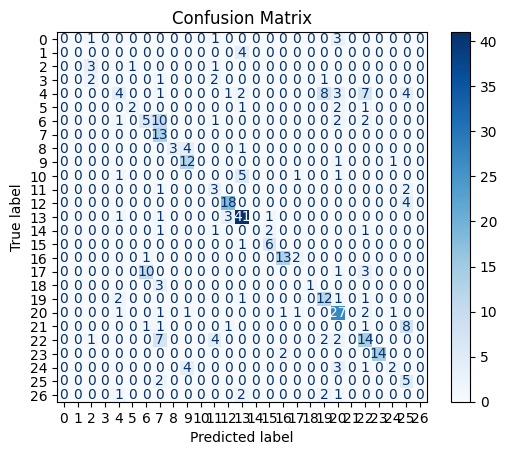

In [93]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

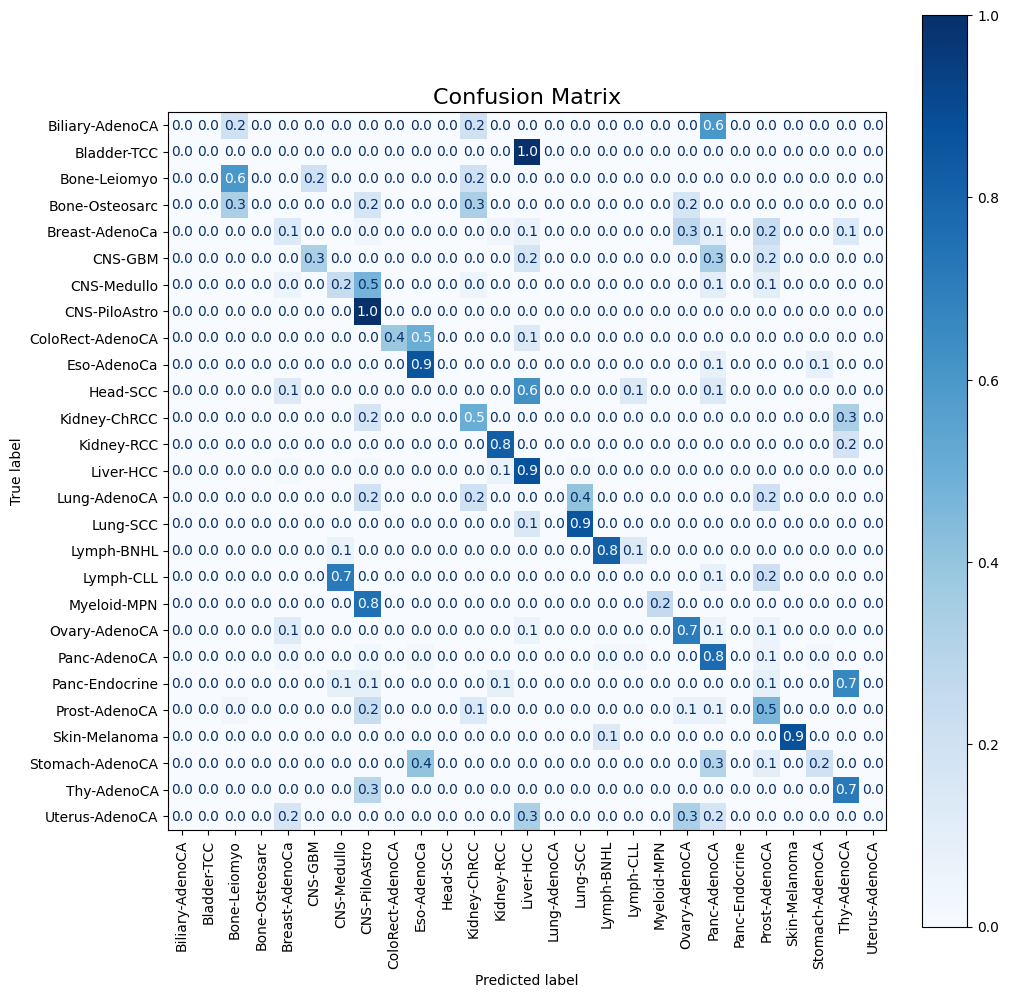

In [94]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, values_format=".1f", xticks_rotation=90)

plt.title('Confusion Matrix', fontsize=16)

plt.savefig(f"PCA_MutSig_CM.pdf", bbox_inches='tight')

plt.show()